# Project: IBM HR – Employee Attrition

Source: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

## Import

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display

In [5]:
IBM_HR = pd.read_csv('IBM_HR_Employee/HR-Employee-Attrition.csv')

In [6]:
df1 = IBM_HR

In [6]:
df1.shape

(1470, 35)

In [ ]:
df1.head(1)

In [ ]:
df1.info()

## General EDA - Cleaning - Visualization

In [4]:
# Review cols
df1cols = [i for i in df1.columns]
display(df1cols)

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [5]:
# Move Target/label var to the front of the DF
switchcol = df1['Attrition']
df1.drop(labels=['Attrition'], axis=1,inplace = True)
df1.insert(0, 'Attrition', switchcol)
#df1.head(2)


# Move JobSatisfaction to the front of the DF
switchcol = df1['JobSatisfaction']
df1.drop(labels=['JobSatisfaction'], axis=1,inplace = True)
df1.insert(1, 'JobSatisfaction', switchcol)
df1.head(1)

,Attrition,JobSatisfaction,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,4,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5


In [ ]:
df1['Attrition'].head(25)

In [7]:
# Review col names
df1cols = [i for i in df1.columns]
display(df1cols)

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [ ]:
# review null values
df1.isnull().any()

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [10]:
df1['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [11]:
# attrition percent
df1['Attrition'].value_counts() / sum(df1['Attrition'].value_counts())

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

In [9]:
# reviewing value counts for descriptive features
valuecounts1 = pd.DataFrame(df1['BusinessTravel'].value_counts())
valuecounts2 = pd.DataFrame(df1['Department'].value_counts())
valuecounts3 = pd.DataFrame(df1['EducationField'].value_counts())
#valuecounts4 = pd.DataFrame(df1['Gender'].value_counts())
valuecounts5 = pd.DataFrame(df1['JobRole'].value_counts())
valuecounts6 = pd.DataFrame(df1['MaritalStatus'].value_counts())
valuecounts7 = pd.DataFrame(df1['Over18'].value_counts())
valuecounts8 = pd.DataFrame(df1['OverTime'].value_counts())
valuecounts9 = pd.DataFrame(df1['Attrition'].value_counts())

display(valuecounts1, 
        valuecounts2,
        valuecounts3,
#        valuecounts4,
        valuecounts5,
        valuecounts6,
        valuecounts7,
        valuecounts8,
        valuecounts9)

,BusinessTravel
Travel_Rarely,1043
Travel_Frequently,277
Non-Travel,150


,Department
Research & Development,961
Sales,446
Human Resources,63


,EducationField
Life Sciences,606
Medical,464
Marketing,159
Technical Degree,132
Other,82
Human Resources,27


,JobRole
Sales Executive,326
Research Scientist,292
Laboratory Technician,259
Manufacturing Director,145
Healthcare Representative,131
Manager,102
Sales Representative,83
Research Director,80
Human Resources,52


,MaritalStatus
Married,673
Single,470
Divorced,327


,Over18
Y,1470


,OverTime
No,1054
Yes,416


,Attrition
No,1233
Yes,237


### Visualization

#### Numeric

In [9]:
num_counts = pd.crosstab([df1['Department'], df1['Gender']], df1['Attrition'], margins=True)
num_counts

Attrition                        No  Yes   All
Department             Gender                 
Human Resources        Female    14    6    20
                       Male      37    6    43
Research & Development Female   336   43   379
                       Male     492   90   582
Sales                  Female   151   38   189
                       Male     203   54   257
All                            1233  237  1470

In [ ]:
# Visulazing the distibution of the data for every feature
df1.hist(edgecolor='lightblue', linewidth=1.2, figsize=(16, 16))

#### Graphic

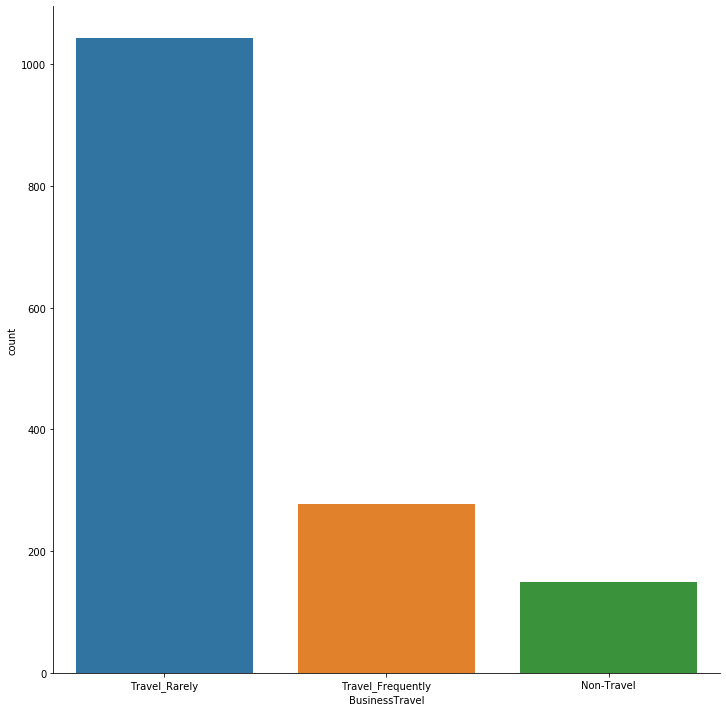

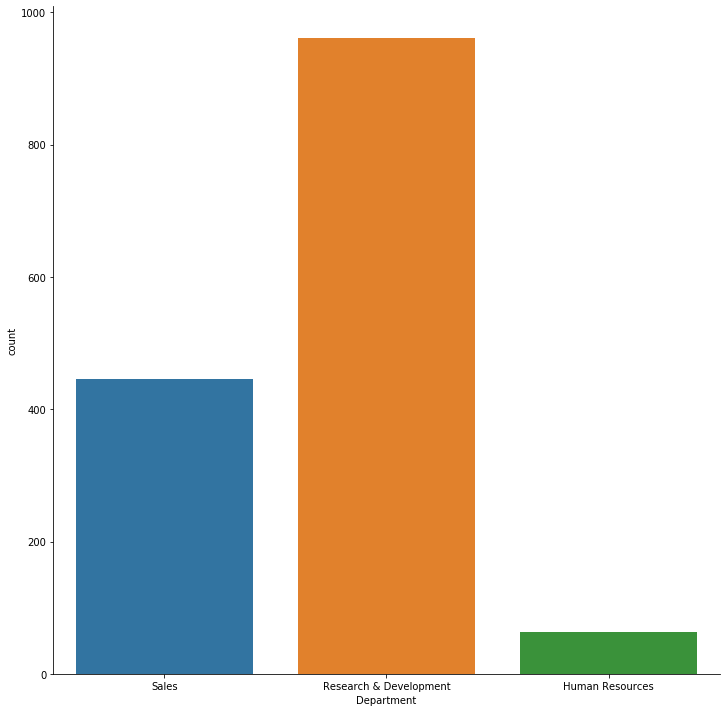

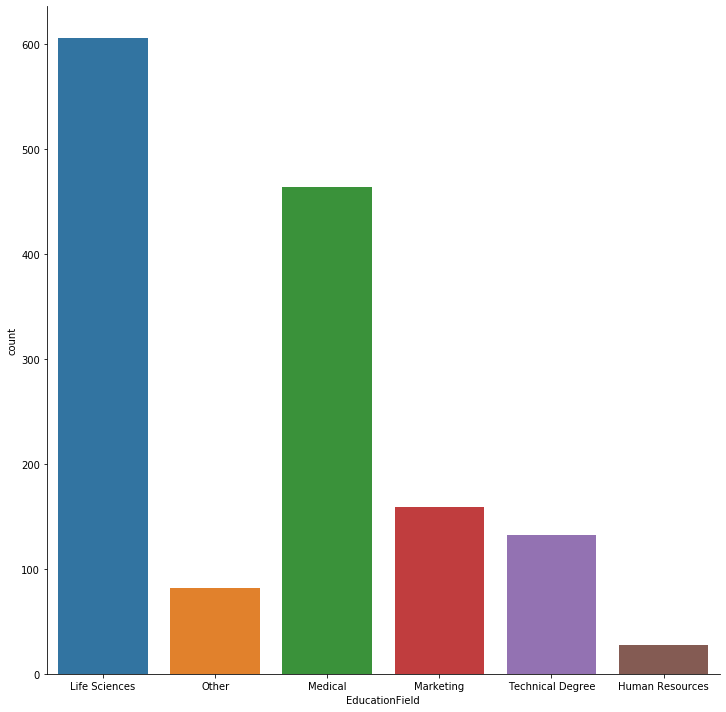

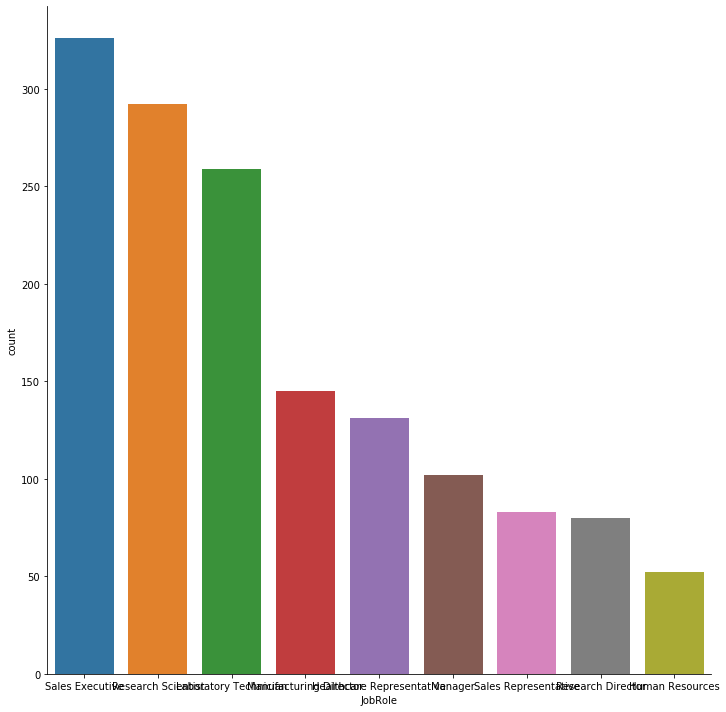

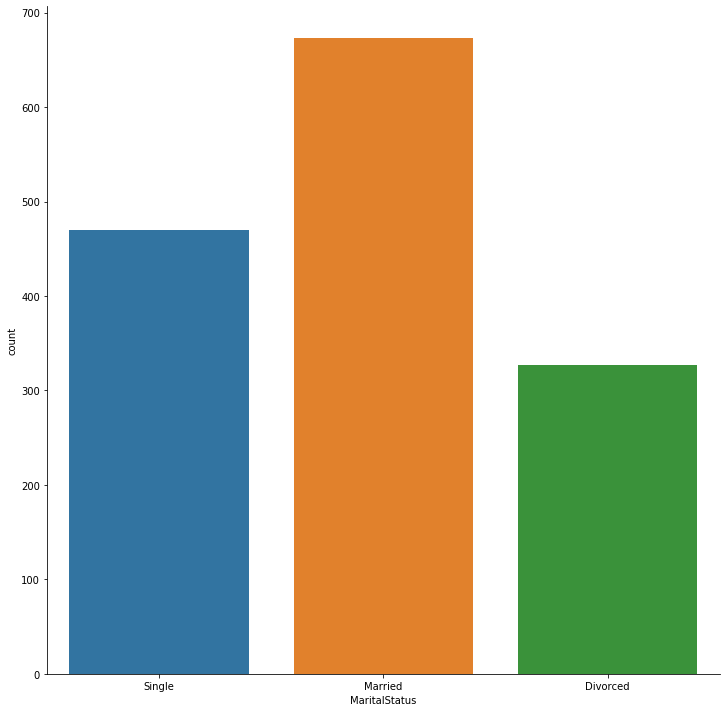

In [12]:
colstoplot_freq = ['BusinessTravel', 'Department',
                   'EducationField', 'JobRole', 'MaritalStatus']

for i in colstoplot_freq:
    sns.factorplot(data=df1, kind='count', size=10,
                   # aspect=1.5,
                   x=i)

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

C:\Users\MasterDK-Laptop\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\MasterDK-Laptop\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\MasterDK-Laptop\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\MasterDK-Laptop\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size

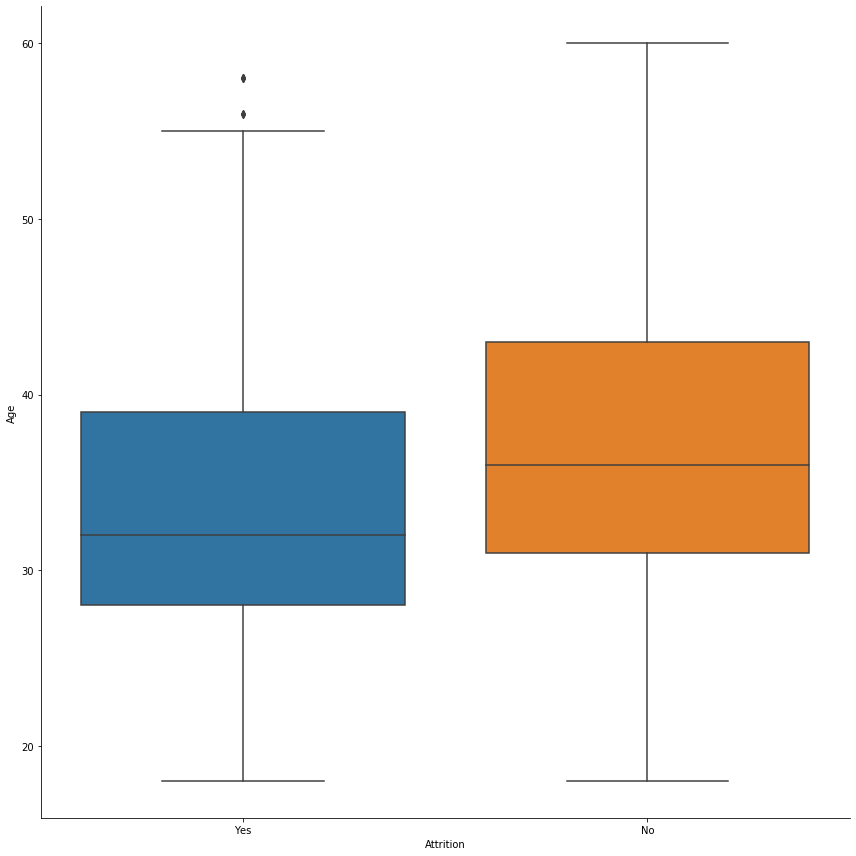

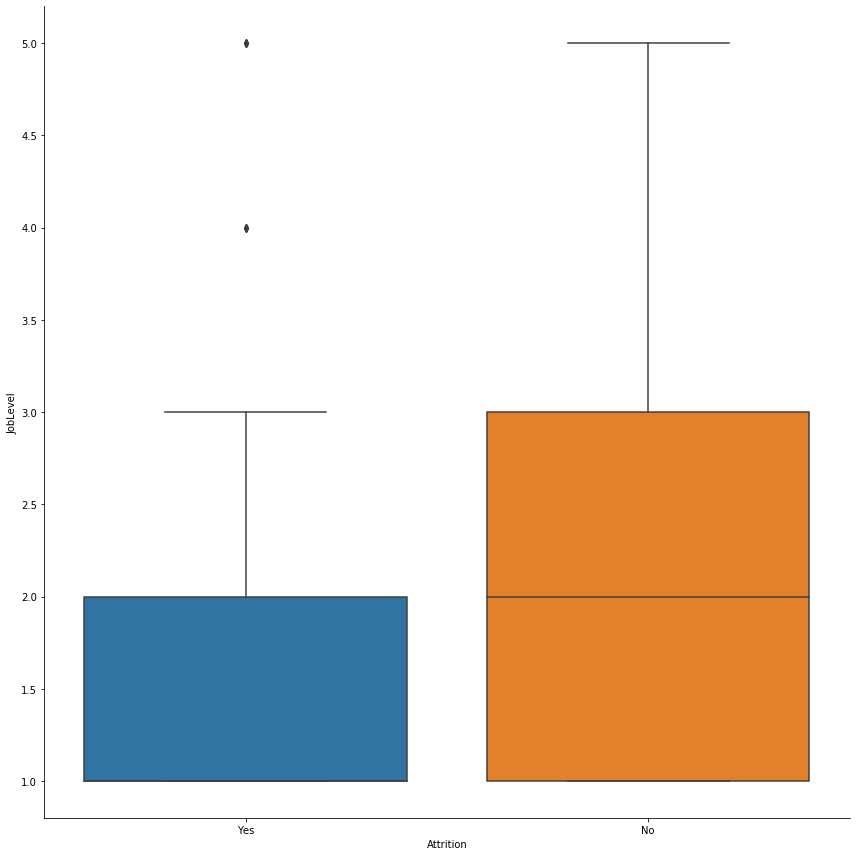

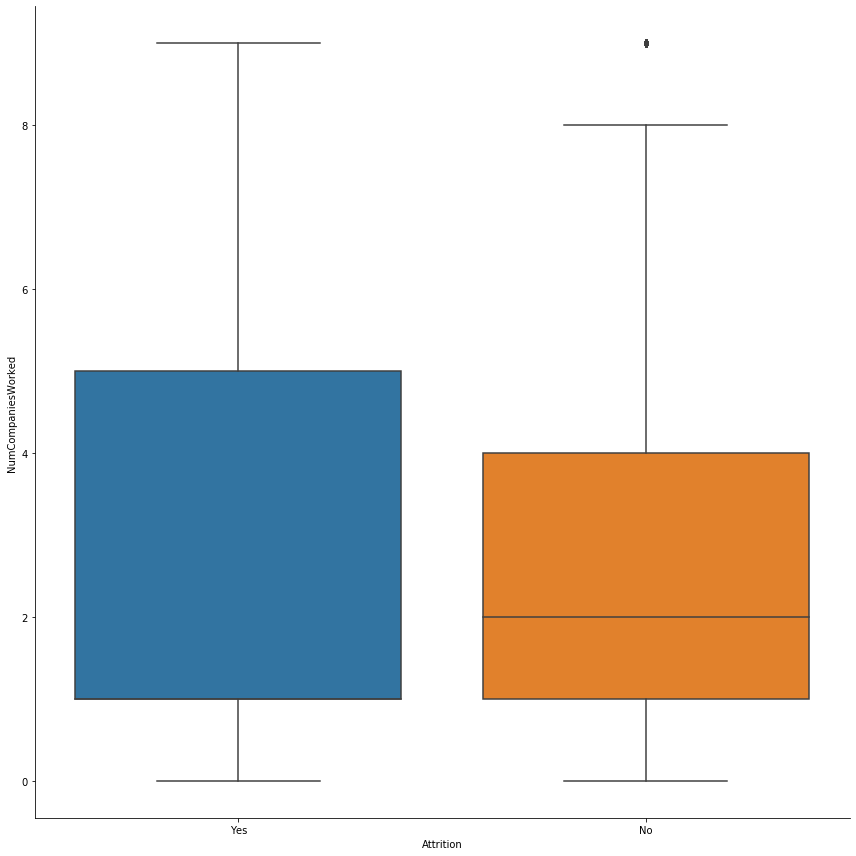

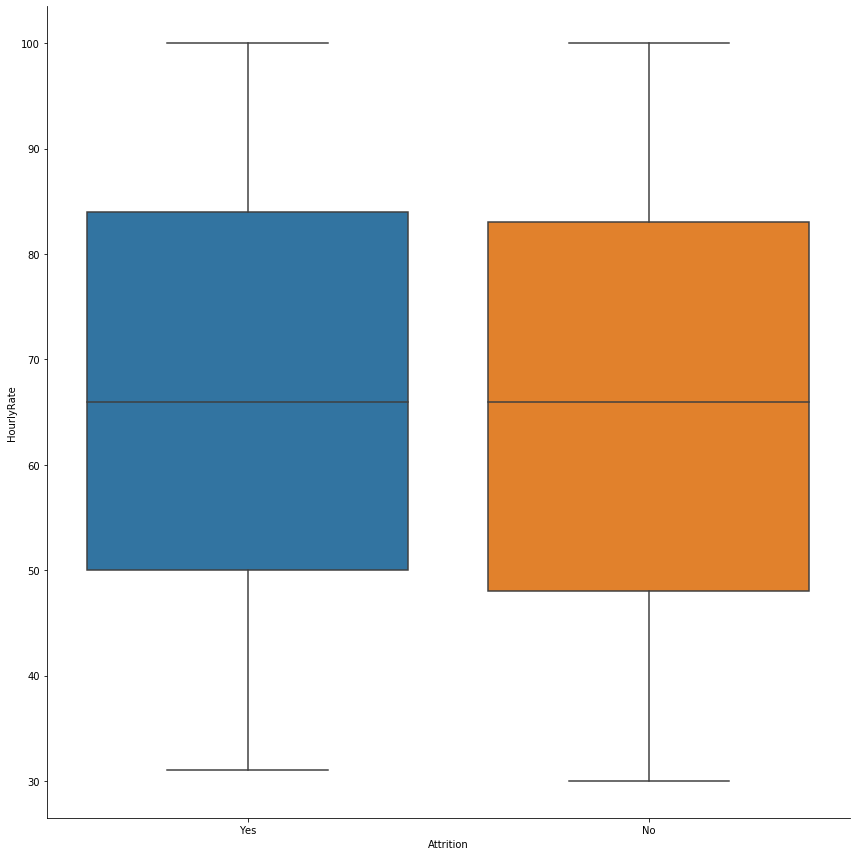

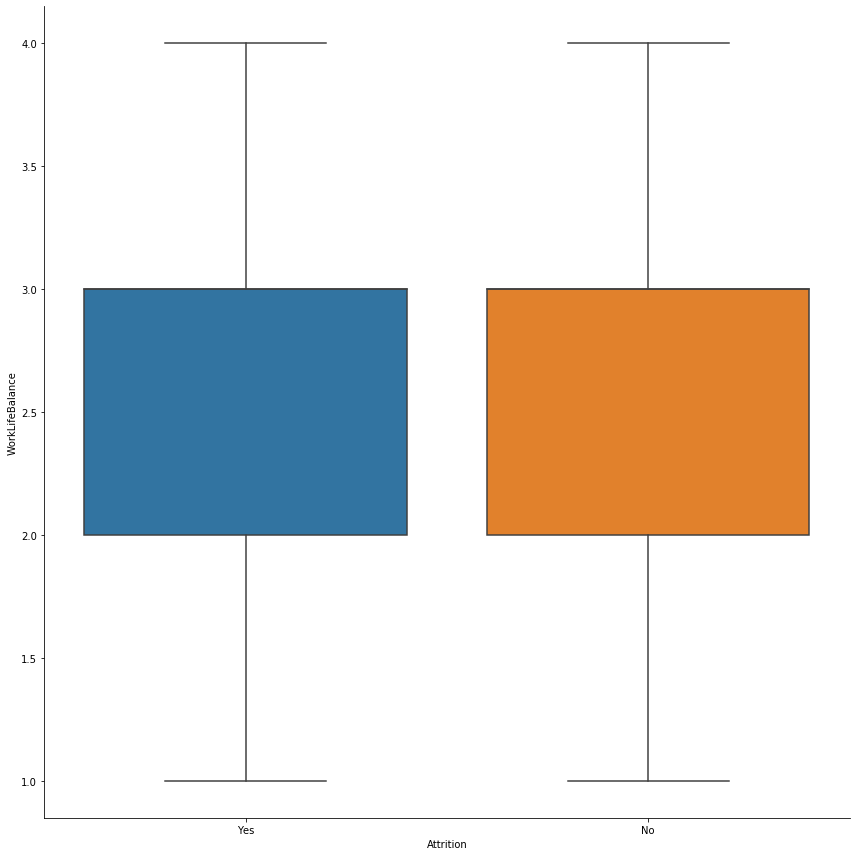

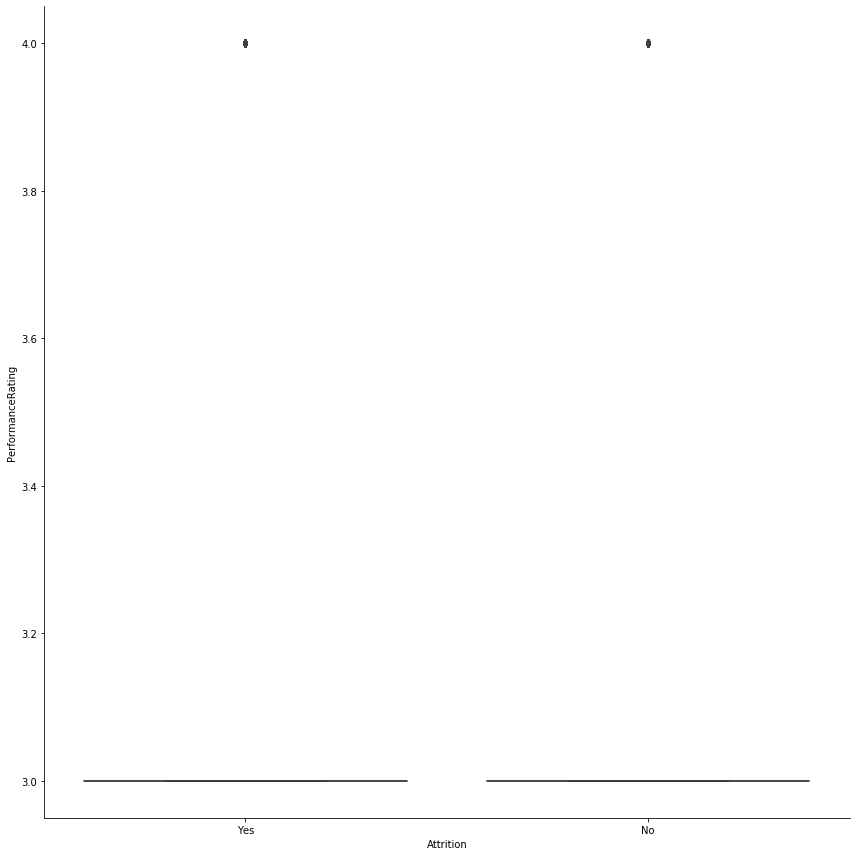

In [19]:
colstoplot_box = ['Age', 
                  'JobLevel', 
                  'NumCompaniesWorked',
                  'HourlyRate', 
                  'WorkLifeBalance', 
                  'PerformanceRating']

for i in colstoplot_box:
    sns.factorplot(data=df1, y=i, x='Attrition', size=12, 
                   aspect=1, 
                   kind='box')

## Statistics, Data Manipulation, Pre-Model

### Data Manipulation

In [ ]:
# review datatypes - are they numeric or strings
df1.info()

In [2]:
# replace values in label, yes/no with 1/0. ONLY RUN ONCE!
yesnoVals = {'Yes': 1,
             'No': 0}

df1['Attrition'] = df1['Attrition'].map(yesnoVals)
df1['Attrition'].head()

NameError: name 'df1' is not defined

In [ ]:
# replace values in label, yes/no with 1/0. ONLY RUN ONCE!

yesnoVals = {'Yes': 1,
             'No': 0}
df1['OverTime'] = df1['OverTime'].map(yesnoVals)
df1['OverTime'].head()

In [ ]:
# replace values in label. ONLY RUN ONCE!

YandNVals = {'Y': 1,
             'N': 0}
df1['Over18'] = df1['Over18'].map(YandNVals)
df1['Over18'].head()

In [ ]:
# replace values in label ONLY RUN ONCE!

genderM = {'Male': 1,
           'Female': 0}
genderF = {'Female': 1,
           'Male': 0}
df1['GenderM'] = df1['Gender'].map(genderM)            
df1['GenderF'] = df1['Gender'].map(genderF)
df1.drop(labels=['Gender'], axis=1,inplace = True)
display(df1['GenderM'].head(),
       df1['GenderF'].head())

In [12]:
# review datatypes - are they numeric or strings
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

#### Graphic

### Statistics

In [1]:
#Correlation Matrix
corr = df1.corr()
corr = (corr)
plt.figure(figsize=(30, 30))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

#corr

NameError: name 'df1' is not defined

In [ ]:
# Compute the correlation matrix
corr = df1.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 180, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#plt.figure(figsize=(30, 30))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Pre-Modeling

In [ ]:
# placeholder

In [20]:
# Threshold for removing correlated variables
threshold = 0.8

# Absolute value correlation matrix
corr_matrix = df3.corr().abs()
corr_matrix.head()

# Upper triangle of correlations
upper = corr_matrix.where(
    np.triu(
        np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(
    upper[column] > threshold)]

print('There are %d columns to remove :' % (len(to_drop)))

data = data.drop(columns=to_drop)

to_drop

NameError: name 'df3' is not defined

## Modeling

#### Model 1

In [13]:
# Load modeling libraries
from sklearn.tree            import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn                 import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.tree          import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display       import Image  
import pydotplus  

# Install if needed
#(conda install pydotplus) or (pip install pydotplus)
#(conda install graphviz) or (pip install graphviz)

# If there are issues with graphviz, run the code below. If InvocationException
#import os
#os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"


C:\Users\MasterDK-Laptop\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


C:\Users\MasterDK-Laptop\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\MasterDK-Laptop\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


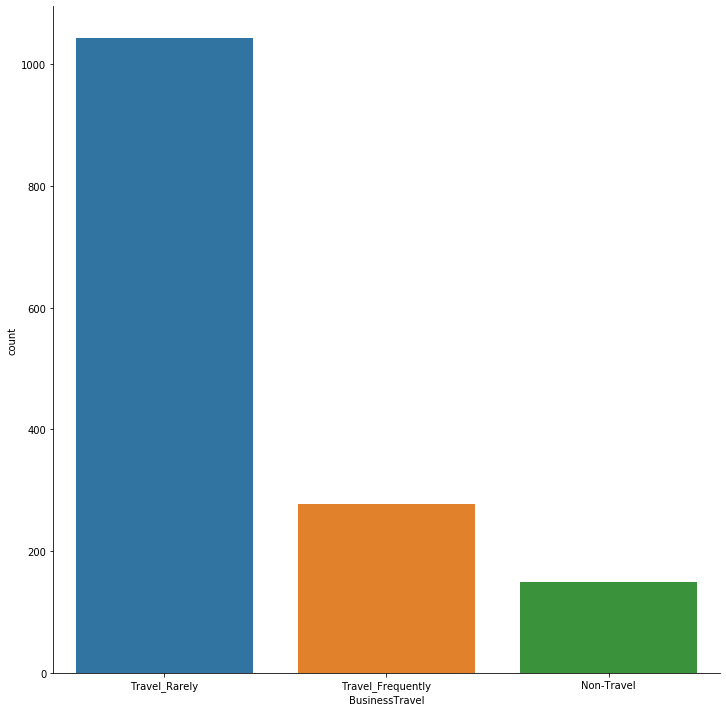

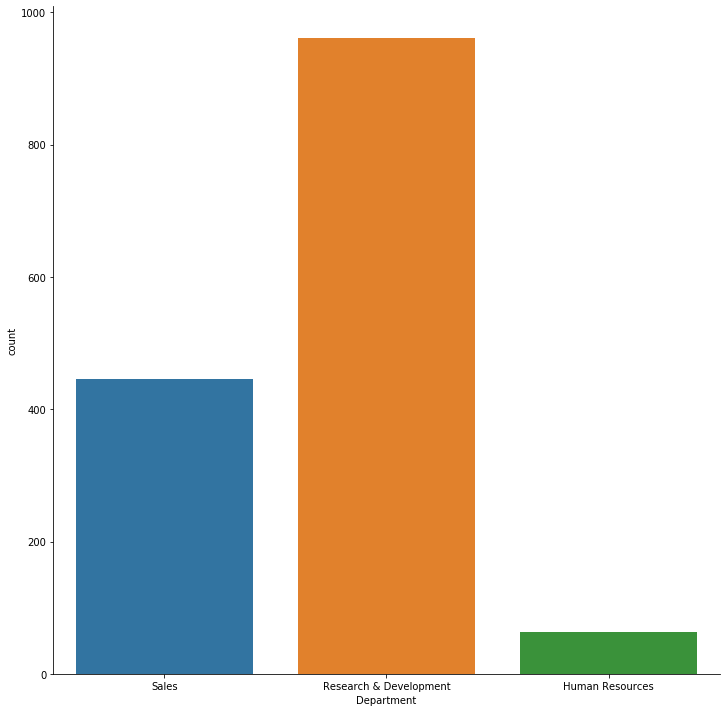

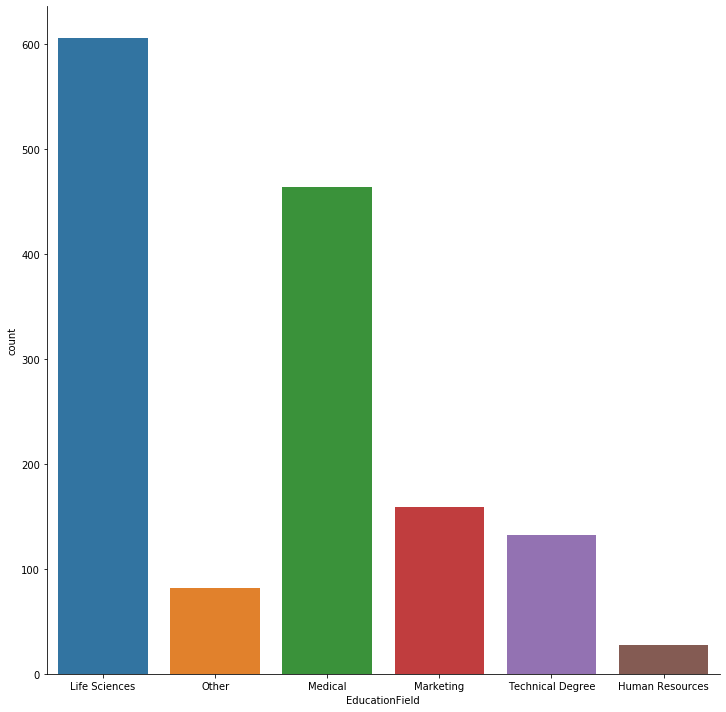

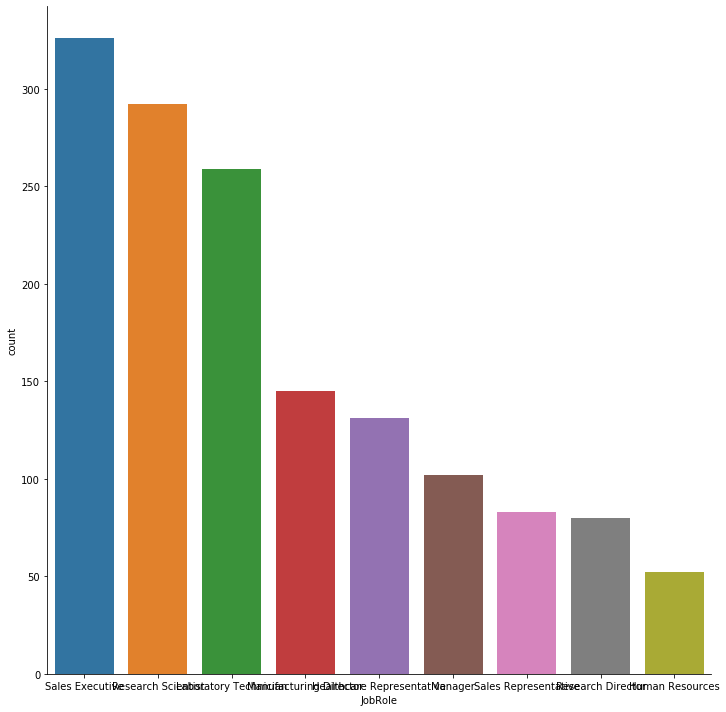

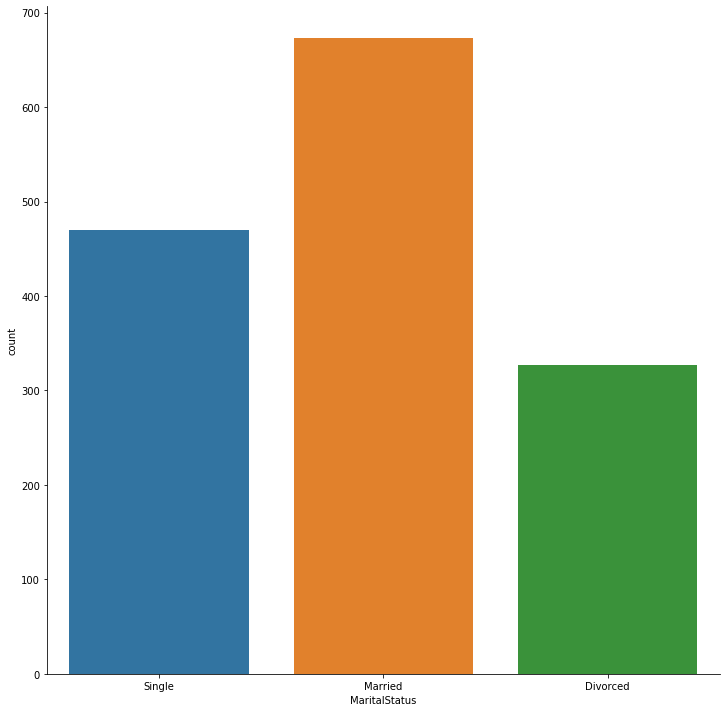

In [10]:
colstoplot = ['BusinessTravel', 'Department',
              'EducationField', 'JobRole', 'MaritalStatus']

for i in colstoplot:
    sns.factorplot(data=df1, kind='count', size=10, 
                  # aspect=1.5, 
                   x=i)

In [14]:
# FEATURE SELECTION
# - - -

# drop certain columns
df2 = df1
df2.drop(labels=['BusinessTravel'], axis=1,inplace = True)
df2.drop(labels=['Department'], axis=1,inplace = True)
df2.drop(labels=['EducationField'], axis=1,inplace = True)
df2.drop(labels=['JobRole'], axis=1,inplace = True)
df2.drop(labels=['MaritalStatus'], axis=1,inplace = True)

# split dataset in features and target variable
feature_cols = [i 
                for i in df2.columns]

del feature_cols[0]
X = df1[feature_cols] # Features
Y = df1['Attrition']  # Target variable

# review that the correct features were added
display('target', pd.DataFrame(Y).columns,
        'features', pd.DataFrame(X).columns)

'target'

Index(['Attrition'], dtype='object')

'features'

Index(['Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
# SPLIT THE DATA
# - - -

# Split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1) # 80% training and 20% test

In [ ]:
#BUILDING DECISION TREE MODEL
# - - -

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion = "gini",
                             splitter  = 'best', 
                             max_depth = None) 


# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)

In [ ]:
# EVALUATE THE MODEL

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))


In [ ]:
# VISUALIZE THE DECISION TREE

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Attrition.png')
Image(graph.create_png())

In [ ]:
# Optimizing Decision Tree Performance

# Create Decision Tree classifer object
# criterion - using "gini" for Gini index  | “entropy” for the information gain.
# splitter  - “best”  choose the best split | “random” to choose the best random split.
# max_depth - higher value of maximum depth causes overfitting, and a lower value causes underfitting
clf2 = DecisionTreeClassifier(criterion = 'entropy', 
                              splitter  = 'random',
                              max_depth = 3)

# Train Decision Tree Classifer
clf2 = clf2.fit(X_train,Y_train)

# Predict the response for test dataset
Y_pred = clf2.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

In [ ]:
# VISUALIZE NEW DECISION TREE

dot_data = StringIO()
export_graphviz(clf2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Attrition2.png')
Image(graph.create_png())